# Lensing of a color image

This notebook walks you through a simple example of taking an image (in r,g,b colors), lens it, and create a colored lensed image.

In [1]:
# standard python imports
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

# make sure lenstronomy is installed, otherwise install the latest pip version
try:
    import lenstronomy
except:
    %pip install lenstronomy


# we use the LensModel and LightModel routines
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel


### Make lens model and perform ray tracing

Here we set up a lens model, define a coordinate grid and ray-trace the image positions back to the source plane.

In [2]:

lens_model_list = ["SIE", "SHEAR"]
lens_model = LensModel(lens_model_list=lens_model_list)

kwargs_lens = [{"theta_E": 200, "e1": 0, "e2": 0, "center_x": 0, "center_y": 0},
               {"gamma1": 0.1, "gamma2": 0}]

num_pix = 1000  # number of rays/pixels per axis
deltapix = 1 # pixel scale (here we set it =1 to operate in pixel units, but this can be changed)


# set up a coordinate grid and transform them into 2d arrays defining the image plane grid
import lenstronomy.Util.util as util
x, y = util.make_grid(numPix=num_pix, deltapix=deltapix)  # make a coordinate grid
x2d = util.array2image(x)
y2d = util.array2image(y)

# perform ray tracing, mapping the image plane coordinates to the source plane
beta_x, beta_y = lens_model.ray_shooting(x2d, y2d, kwargs_lens)


### Import an image
Here we import a know image in rgb colors

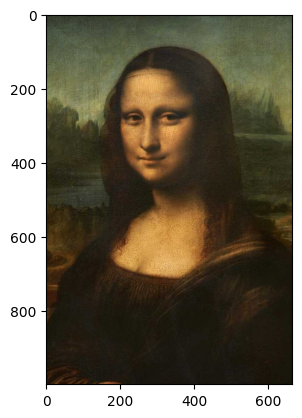

In [3]:
# load the image and convert into
# numpy array

from PIL import Image
_path = os.getcwd()
_path, _ = os.path.split(_path)
base_path, _ = os.path.split(_path)
path_data = os.path.join(base_path, "data")


img = Image.open(path_data + "/test_image.jpeg")
image_array = np.asarray(img)

plt.imshow(image_array)
plt.show()

image_r = np.array(image_array[:, :, 0], dtype=float)
image_g = np.array(image_array[:, :, 1], dtype=float)
image_b = np.array(image_array[:, :, 2], dtype=float)


### Calculate distorted image
We use the LightModel class to define an interpolated surface brightness for each imaging band.
We then evaluate the surface brightness at the original source positions (beta_x, beta_y) corresponding to the image pixels.

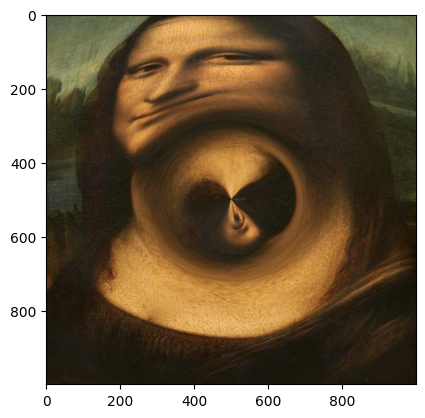

In [4]:

light_model_list = ["INTERPOL"]

light_model_r = LightModel(light_model_list=light_model_list)
kwargs_light_r = [{"image": image_r, "amp": 1, "center_x": 0, "center_y": 0, "phi_G": 0, "scale": 1}]
image_r_lensed = light_model_r.surface_brightness(beta_x, beta_y, kwargs_light_r)

light_model_g = LightModel(light_model_list=light_model_list)
kwargs_light_g = [{"image": image_g, "amp": 1, "center_x": 0, "center_y": 0, "phi_G": 0, "scale": 1}]
image_g_lensed = light_model_g.surface_brightness(beta_x, beta_y, kwargs_light_g)

light_model_b = LightModel(light_model_list=light_model_list)
kwargs_light_b = [{"image": image_b, "amp": 1, "center_x": 0, "center_y": 0, "phi_G": 0, "scale": 1}]
image_b_lensed = light_model_b.surface_brightness(beta_x, beta_y, kwargs_light_b)


# display image
height, width = np.shape(image_b_lensed)
channels = 3
#height, width, channels = 100, 150, 3
image_lensed = np.zeros((height, width, channels), dtype=np.uint8)

image_lensed[:, :, 0] = image_r_lensed
image_lensed[:, :, 1] = image_g_lensed
image_lensed[:, :, 2] = image_b_lensed

plt.imshow(image_lensed)
plt.show()
